### 0. Import libraries and import data

In [113]:
import math
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()
matplotlib.rcParams.update({'font.size': 24})

### 1. Plot confidence intervals

In [141]:
def plot_confidence_interval(x, values, z=1.96, color='#7848aa', horizontal_line_width=0.25):
    marker = ['8', 'D', 's', 'o'][0]

    mean = np.array(values).mean()
    stdev = np.array(values).std()
    confidence_interval = z * stdev / math.sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color, linewidth=4)
    plt.plot([left, right], [top, top], color=color, linewidth=4)
    plt.plot([left, right], [bottom, bottom], color=color, linewidth=4)
    plt.plot(x, mean, marker, color='#6ec6ca', markersize=12)

In [145]:
def plot_save_conf_intervals(baseline, optimized, optimized_pos_after, metric):
    fig, _ = plt.subplots(1, 1)
    fig.set_size_inches(4, 3)

    plot_confidence_interval(1, baseline)
    plot_confidence_interval(2, optimized)
    plot_confidence_interval(3, optimized_pos_after)
    plt.xticks([1, 2, 3], ['Fine-tuned', 'Optimized', 'Optimized\nPOS after'])
    plt.title('Model performance - 95% confidence intervals')
    plt.ylabel(metric)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(left=0.15)

    plt.show()
    fig.savefig(f'../../results/model_performance_{metric.lower().replace(" ", "_")}.png', dpi=300)

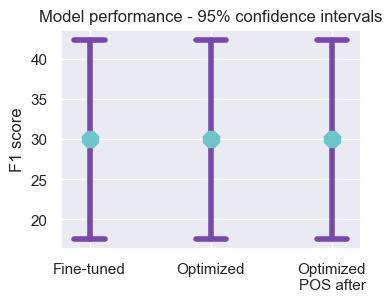

In [146]:
baseline_f1 = [10, 20, 30, 40, 50]
optimized_f1 = [10, 20, 30, 40, 50]
optimized_pos_after_f1 = [10, 20, 30, 40, 50]

plot_save_conf_intervals(baseline_f1, optimized_f1, optimized_pos_after_f1, "F1 score")

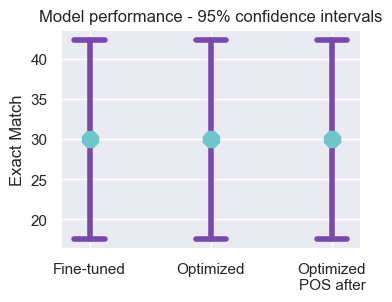

In [147]:
baseline_em = [10, 20, 30, 40, 50]
optimized_em = [10, 20, 30, 40, 50]
optimized_pos_after_em = [10, 20, 30, 40, 50]

plot_save_conf_intervals(baseline_f1, optimized_f1, optimized_pos_after_f1, "Exact Match")